## Linear Regression

In [1]:
import numpy as np
import pandas as pd

#data sset

spr=pd.read_csv("C:/Users/lenovo/Downloads/auto-mpg.data",header=None,usecols=[0,1,2,3,4,5],sep='\s+',engine='python',na_values="?")

In [2]:
spr.head(3)

,0,1,2,3,4,5
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0


In [3]:
spr.columns=["a","b","c","d","e","f"]

In [4]:
spr.columns

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [5]:
spr.count()

a    398
b    398
c    398
d    392
e    398
f    398
dtype: int64

In [6]:
spr.isna().any()

a    False
b    False
c    False
d     True
e    False
f    False
dtype: bool

In [7]:
aD=spr.dropna()

In [8]:
aD.isna().any()

a    False
b    False
c    False
d    False
e    False
f    False
dtype: bool

In [9]:
import sklearn.ensemble as ensm
import sklearn.tree as tree

In [10]:
adb=ensm.AdaBoostClassifier(base_estimator=tree.DecisionTreeRegressor,n_estimators=0,learning_rate=1.0,algorithm='SAMME',random_state=None)

In [11]:
spr.tail()

,a,b,c,d,e,f
393,27.0,4,140.0,86.0,2790.0,15.6
394,44.0,4,97.0,52.0,2130.0,24.6
395,32.0,4,135.0,84.0,2295.0,11.6
396,28.0,4,120.0,79.0,2625.0,18.6
397,31.0,4,119.0,82.0,2720.0,19.4


In [12]:
import sklearn.tree as tree
import sklearn.metrics as evalmetrics
from sklearn.model_selection import train_test_split

In [13]:
indData=aD.loc[:,"b":]
depData=aD.loc[:,"a"]

In [14]:
indData.head()

,b,c,d,e,f
0,8,307.0,130.0,3504.0,12.0
1,8,350.0,165.0,3693.0,11.5
2,8,318.0,150.0,3436.0,11.0
3,8,304.0,150.0,3433.0,12.0
4,8,302.0,140.0,3449.0,10.5


In [15]:
depData.tail()

393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: a, dtype: float64

In [16]:
dtaInd_train,dtaInd_test,dtaDep_train,dtaDep_test=train_test_split(indData,depData,test_size=0.2,random_state=0)

In [17]:
help(adb.fit)

Help on method fit in module sklearn.ensemble._weight_boosting:

fit(X, y, sample_weight=None) method of sklearn.ensemble._weight_boosting.AdaBoostClassifier instance
    Build a boosted classifier from the training set (X, y).
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The training input samples. Sparse matrix can be CSC, CSR, COO,
        DOK, or LIL. COO, DOK, and LIL are converted to CSR.
    
    y : array-like of shape (n_samples,)
        The target values (class labels).
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights. If None, the sample weights are initialized to
        ``1 / n_samples``.
    
    Returns
    -------
    self : object
        Fitted estimator.



In [18]:
tree1=tree.DecisionTreeRegressor(criterion='mse',max_depth=4,random_state=0)

In [19]:
tree1.fit(dtaInd_train,dtaDep_train.values.reshape(-1,1))

DecisionTreeRegressor(max_depth=4, random_state=0)

In [20]:
error1=dtaDep_train-tree1.predict(dtaInd_train)

In [21]:
tree2=tree.DecisionTreeRegressor(criterion='mse',max_depth=4,random_state=0)

In [22]:
tree2.fit(dtaInd_train,error1)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [23]:
tree1.score(dtaInd_test,dtaDep_test)

0.7258812314474041

In [24]:
error2=error1-tree2.predict(dtaInd_train)

In [25]:
tree3=tree.DecisionTreeRegressor(criterion='mse',max_depth=4,random_state=0)

In [26]:
tree3.fit(dtaInd_train,error2)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [27]:
error3=error2-tree3.predict(dtaInd_train)

In [28]:
out=tree1.predict(dtaInd_test)+0.1*tree2.predict(dtaInd_test)

In [29]:
out

array([29.64509747, 26.40392899, 14.46087491, 34.02677639, 34.02677639,
       19.01289084, 34.02677639, 33.87536642, 19.01289084, 26.40392899,
       34.02677639, 14.46087491, 26.40392899, 13.51697247, 14.46087491,
       29.64509747, 24.62851093, 14.46087491, 26.40392899, 26.40392899,
       19.01289084, 19.01289084, 26.25251902, 21.98840104, 29.64509747,
       14.46087491, 29.64509747, 29.64509747, 21.98840104, 14.46087491,
       21.98840104, 26.40392899, 26.40392899, 34.02677639, 19.01289084,
       26.40392899, 34.02677639, 14.46087491, 14.46087491, 14.46087491,
       14.46087491, 34.02677639, 26.40392899, 16.89697247, 29.64509747,
       14.46087491, 26.40392899, 13.51697247, 14.46087491, 21.98840104,
       29.64509747, 14.46087491, 14.46087491, 26.40392899, 26.40392899,
       18.86148087, 19.01289084, 19.01289084, 34.02677639, 26.40392899,
       21.98840104, 26.40392899, 29.64509747, 14.46087491, 34.02677639,
       16.33030581, 14.46087491, 26.40392899, 26.40392899, 34.02

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

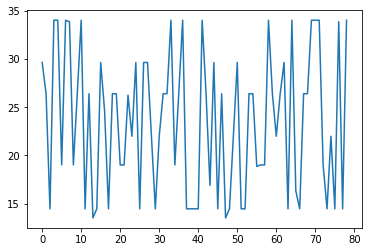

In [31]:
plt.plot(out)
plt.show()

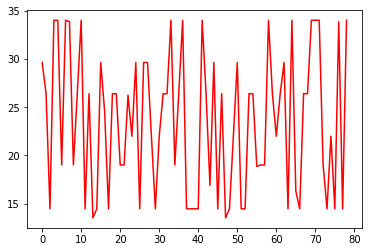

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(out,color='red',linewidth='1.5')
plt.show()

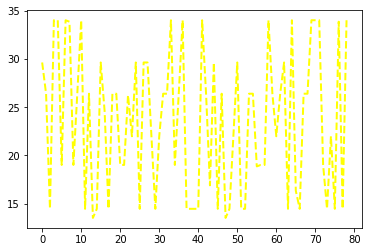

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(out,color='yellow',linewidth='2',linestyle='--')
plt.show()

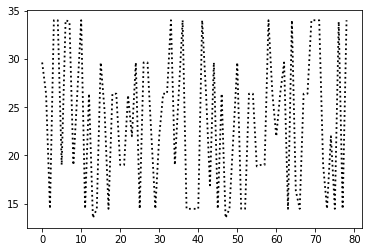

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(out,color='black',linewidth='1.8',linestyle=':')
plt.show()

In [35]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

## Gaussian method

In [3]:
import numpy as np
import pandas as pd

####DATA SET###
ndata=pd.read_csv("C:/Users/lenovo/Downloads/auto-mpg.data",header=None,usecols=[0,1,2,3,4,5],sep='\s+',engine='python',na_values="?")

In [4]:
ndata.head()

,0,1,2,3,4,5
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5


In [114]:
ndata.isna().any()

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

In [5]:
df=ndata.dropna()

In [6]:
df.isnull().any()

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [8]:
len(df)

392

In [9]:
df.shape

(392, 6)

In [10]:
df.head()

,0,1,2,3,4,5
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       392 non-null    float64
 1   1       392 non-null    int64  
 2   2       392 non-null    float64
 3   3       392 non-null    float64
 4   4       392 non-null    float64
 5   5       392 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 21.4 KB


In [121]:
data.describe()

,0,1,2,3,4,5
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [12]:
df=pd.DataFrame(df,columns=['a','b,'c','d','e','op'])

SyntaxError: invalid syntax (<ipython-input-12-f7f943d1e528>, line 1)

In [13]:
data

NameError: name 'data' is not defined

In [147]:
data['0']

KeyError: '0'

In [123]:
####import libraries####

In [124]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [145]:
#ip=data.iloc[:,1:]
#op=data.loc[:,0]
ip=data.loc['0':]
op=data.loc[:'5']

In [146]:
ip

,0,1,2,3,4,5
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6
394,44.0,4,97.0,52.0,2130.0,24.6
395,32.0,4,135.0,84.0,2295.0,11.6
396,28.0,4,120.0,79.0,2625.0,18.6


In [82]:
op=op.astype('int')

In [136]:
Xtrain,Xtest,ytrain,ytest=train_test_split(data[ip],data[op],test_size=0.3,random=1)


ValueError: Boolean array expected for the condition, not int64